<a href="https://colab.research.google.com/github/Prima-7272/BDS/blob/main/Data_Handling_BDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Exploratory Data Analysis (EDA) and Visualization


## FINDEX (Global Financial Index Microdata) and it's business context

The Global Findex database is the most comprehensive dataset on adult financial behaviors worldwide, capturing insights into how individuals save, borrow, make payments, and manage financial risks. Initiated by the World Bank in 2011, the dataset is based on nationally representative surveys of over 150,000 adults across more than 140 economies. The 2021 edition provides updated indicators on the use of both formal and informal financial services.

The dataset offers a unique opportunity for a data analyst to investigate several critical issues related to financial inclusion and digital finance. One of the key areas is Digital Inclusion Analysis, which involves identifying the factors that drive or hinder digital payment usage across different countries and regions, providing insights into the barriers to digital finance. Gender Disparity analysis is crucial for exploring gender-based differences in financial behaviors, including mobile phone ownership and digital payment adoption, highlighting any inequalities that may require targeted interventions. The Financial Inclusion aspect allows an analyst to study factors affecting access to pensions, agricultural payments, and remittances, shedding light on the population segments left out of formal financial systems. Through Regional Comparisons, financial behaviors can be examined across different world regions, identifying regions with high or low access to digital finance and analyzing disparities at the macro level. The dataset also allows for assessing the Impact of Education on financial behaviors, such as internet access and utility payments, to understand how education level influences engagement with digital services. Additionally, investigating Socioeconomic Factors provides insights into how income levels impact access to essential services like mobile phones, the internet, and digital payments, revealing the socioeconomic barriers that affect financial inclusion. Overall, these analyses are critical for developing strategies to enhance financial access, reduce disparities, and promote digital financial services worldwide.

To know more about the dataset https://www.worldbank.org/en/publication/globalfindex


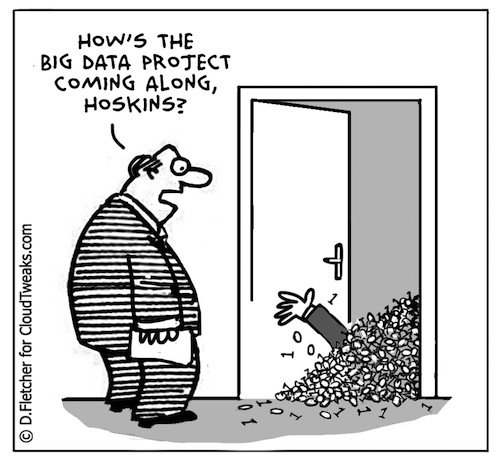

### Data Cleaning and Manipulation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Initially, the data couldn’t be read with UTF-8 due to special characters. Using ChatGPT we found that latin-1 supports these characters, allowing for proper file decoding.
# data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip')

In [9]:
# Reading the data using the raw URL on github
data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip', encoding='latin-1')

### Initial Data Structure Overview: Head, Info, Shape, Index, Column Names and Describe

In [10]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [5]:
data.shape

(143887, 128)

In [6]:
data.index

RangeIndex(start=0, stop=143887, step=1)

In [7]:
data.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

In [8]:
data.describe()

,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
count,1.438870e+05,1.438870e+05,143887.000000,143887.000000,143420.000000,143887.000000,143887.000000,140385.000000,75644.000000,143887.000000,...,143887.000000,143887.000000,114281.000000,143887.000000,114281.000000,143887.000000,143887.000000,143887.000000,114281.000000,143887.000000
mean,7.412421e+07,1.611899e+08,1.000000,1.467742,41.056889,1.968204,3.234239,1.339965,1.579861,0.708646,...,3.508156,3.687171,3.715998,2.570010,3.707020,1.121151,1.303780,0.648856,0.325032,2021.111428
std,2.253154e+08,2.886117e+07,0.807425,0.498960,17.342777,0.723923,1.419803,0.473699,0.493584,0.454388,...,1.074664,0.894404,0.760554,1.328046,1.731587,0.333529,0.474689,0.477329,0.468389,0.314662
min,2.952496e+05,1.111118e+08,0.131675,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2021.000000
25%,4.609787e+06,1.361950e+08,0.437501,1.000000,27.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2021.000000
50%,9.612429e+06,1.613316e+08,0.756633,1.000000,38.000000,2.000000,3.000000,1.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.000000,2021.000000
75%,3.371732e+07,1.861962e+08,1.283792,2.000000,54.000000,2.000000,5.000000,2.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2021.000000
max,1.153773e+09,2.111102e+08,6.245670,2.000000,99.000000,5.000000,5.000000,2.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,4.000000,1.000000,1.000000,2022.000000


### Checking for missing values

In [9]:
# Do to the size of the Dataset we filter columns with missing values greater than 0. We look further into all the
# missing values with pd.set_option('display.max_rows', None) was used afterwards using pd.reset_option('display.max_rows')
pd.reset_option('display.max_rows')
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
regionwb,1000
age,467
emp_in,3502
urbanicity_f2f,68243
account_mob,61181
...,...
fin45_1,33106
fin45_1_China,140387
receive_agriculture,29606
remittances,29606


In [10]:
# Filter rows where 'regionwb' is missing (NaN)
missing_region = data[data['regionwb'].isnull()]

# Print the first few rows where 'regionwb' is missing
print(missing_region.head(10))

              economy economycode regionwb   pop_adult  wpid_random       wgt  \
123861  Taiwan, China         TWN      NaN  20584760.0    204980045  1.070940   
123862  Taiwan, China         TWN      NaN  20584760.0    202975224  1.016513   
123863  Taiwan, China         TWN      NaN  20584760.0    119288733  2.458148   
123864  Taiwan, China         TWN      NaN  20584760.0    126952391  2.009794   
123865  Taiwan, China         TWN      NaN  20584760.0    159279170  1.401549   
123866  Taiwan, China         TWN      NaN  20584760.0    118940104  0.972358   
123867  Taiwan, China         TWN      NaN  20584760.0    118675494  1.167064   
123868  Taiwan, China         TWN      NaN  20584760.0    127658782  0.483968   
123869  Taiwan, China         TWN      NaN  20584760.0    183534234  0.716444   
123870  Taiwan, China         TWN      NaN  20584760.0    171255474  3.562657   

        female   age  educ  inc_q  ...  receive_transfers  receive_pension  \
123861       1  54.0     2    

In [11]:
# Filter rows where 'regionwb' is missing
missing_region = data[data['regionwb'].isnull()]

# Group by 'economy' and count the number of missing 'regionwb' for each country
missing_by_country = missing_region.groupby('economy').size()

# Print the results
print(missing_by_country)

economy
Taiwan, China    1000
dtype: int64


Its clear that there are significant missing values in the dataset. However, many of these missing values result from certain follow up questions not being asked to all participants, which accounts for the bulk of the missing data. Additionally, we notice some missing information regarding the age, region, and employment status of participants. Since the missing values in these key categories (age, region, and workforce status) is quite small compared to the dataset size, it has been decided to remove these rows as we don't want to simulate age or workforce status.

Additionally, columns with a high percentage of missing data (up to 90%) were removed, as they generally represent niche or specific follow-up questions. This simplification streamlines the dataset without affecting its overall quality, as our focus is on a broader analysis rather than specific topics like how domestic remittances were received.

In [12]:
# Removing the rows with missing values in 'regionwb', 'age', and 'emp_in'
data_cleaned = data.dropna(subset=['regionwb', 'age', 'emp_in']).copy()

# Removing columns with more than 4000 missing values
missing_threshold = 4000




#_________________________________________________________________
#cols_to_drop = data_cleaned.columns[data_cleaned.isnull().sum() > missing_threshold]

# Dropping the columns
#data_cleaned = data_cleaned.drop(columns=cols_to_drop)

# Cleaned dataset info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138973 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 136.8+ MB


**This leaves us with a dataset of 138973 rows and 42 columns with zero missing values**.

**The remaining columns signify the following information which we will be working with to explore the dataset further:**

0. economy: The name of the country or economy.
1. economycode: ISO 3-digit code representing each economy.
2. regionwb: World Bank region classification (e.g., Sub-Saharan Africa, East
    Asia, etc.).
3.  pop_adult: The population of adults (aged 15+) in the economy.
4.  wpid_random: A unique identifier for each respondent in the dataset.
5.  wgt: Survey weight for each respondent, used to make the sample
    representative of the population.
6.  female: Gender of the respondent (1 if female, 2 if male).
7.  age: Age of the respondent.
8.  educ: Respondent’s education level form level 1 to 3
9.  inc_q: Income quintile of the respondent’s household.
10. emp_in: Employment status of the respondent.
11. account: Whether the respondent has an account at a financial institution
    or with a mobile money service provider.
12. account_fin: Whether the respondent has an account at a formal financial
    institution.
13. fin2: Has a debit card
14. fin14_1: Whether the respondent used mobile money.
15. fin14a: Made bill payments online using the Internet
16. fin14a1: Send money to a relative or friend online
    using the Internet
17. fin14b: Bought something online using the Internet
18. fin16: Saved for old age
19. fin17a: Saved using an account at a financial
    institution
20. fin20: Borrowed for medical purposes
21. fin22a: Borrowed from a financial institution
22. fin22b: Borrowed from family or friends
23. fin24: Main source of emergency funds in 30 days
24. fin30: Paid a utility bill
25. fin32: Received wage payments
26. fin37: Received a government transfer
27. fin38: Received a government pension
28. fin44a: Financially worried: old age
29. fin44b: Financially worried: medical cost
30. fin44c: Financially worried: bills
31. fin44d: Financially worried: education
32. saved: Saved money in the past 12 months.
33. borrowed: Borrowed money in the past 12 months.
34. receive_wages: Received a wage payment and method
35. receive_transfers: Received government transfers or aid payments and method
36. receive_pension: Received government pension payments. and method
37. pay_utilities: Paid utility bills and method
38. mobileowner: Whether the respondent owns a mobile phone.
39. internetaccess: Whether the respondent has access to the internet.
40. anydigpayment: Whether the respondent made any digital payment.
41. year: The year of the data collection

In [13]:
data_cleaned['economy'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon',
       'Lesotho', 

In [14]:
data_cleaned['economycode'].unique()

array(['AFG', 'ALB', 'DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BGD',
       'BEL', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'KHM',
       'CMR', 'CAN', 'TCD', 'CHL', 'COL', 'COM', 'COD', 'COG', 'CRI',
       'HRV', 'CYP', 'CZE', 'CIV', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV',
       'EST', 'SWZ', 'ETH', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GTM', 'GIN', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KOR', 'XKX', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', 'MDA', 'MNG', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PRY',
       'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SEN', 'SRB',
       'SLE', 'SGP', 'SVK', 'SVN', 'ZAF', 'SSD', 'ESP', 'LKA', 'SWE',
       'CHE', 'TJK', 'TZA', 'THA', 'TGO', 'TUN', 'TUR', 'UGA', 'UKR',
       'ARE', 'GBR',

###Exploratory Data Analysis (EDA)


Let's conduct a deep, specific analysis focused on factors affecting digital payment usage across different regions and demographic groups. We'll investigate key aspects such as gender, age, education, and income levels, with the aim of identifying the demographic Patterns, regional Disparities and socioeconomic Influence.


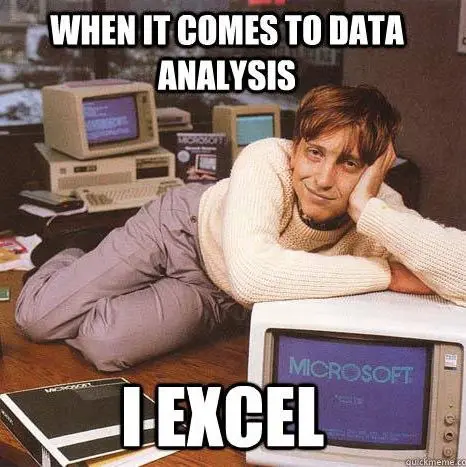

Question-1 Demographic Patterns: Who uses digital payments more frequently? We'll explore how gender, age, and education levels affect digital payment usage.

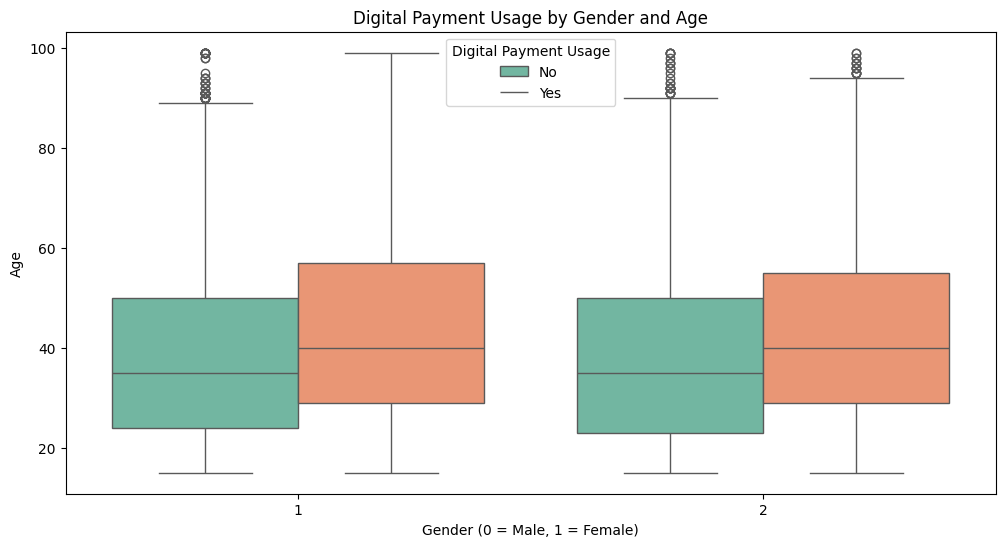

<Figure size 1200x600 with 0 Axes>

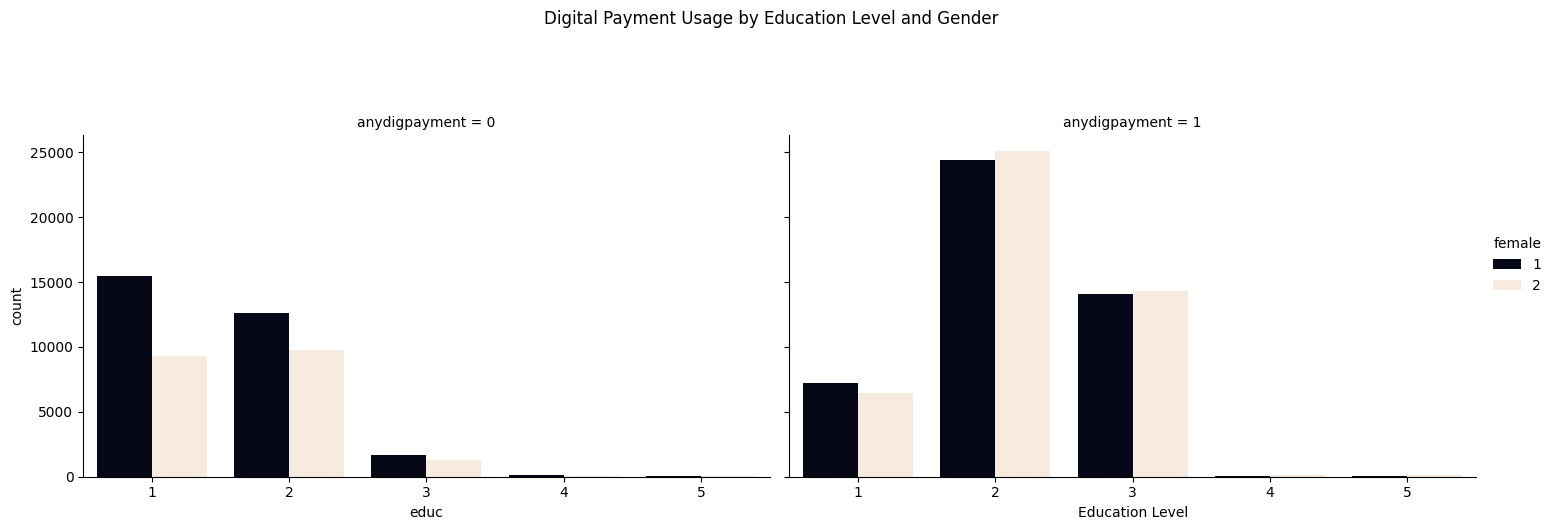

<ipython-input-15-ec91dbcc2a10>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='anydigpayment', data=data_filtered, estimator=lambda x: sum(x) / len(x), palette="viridis")


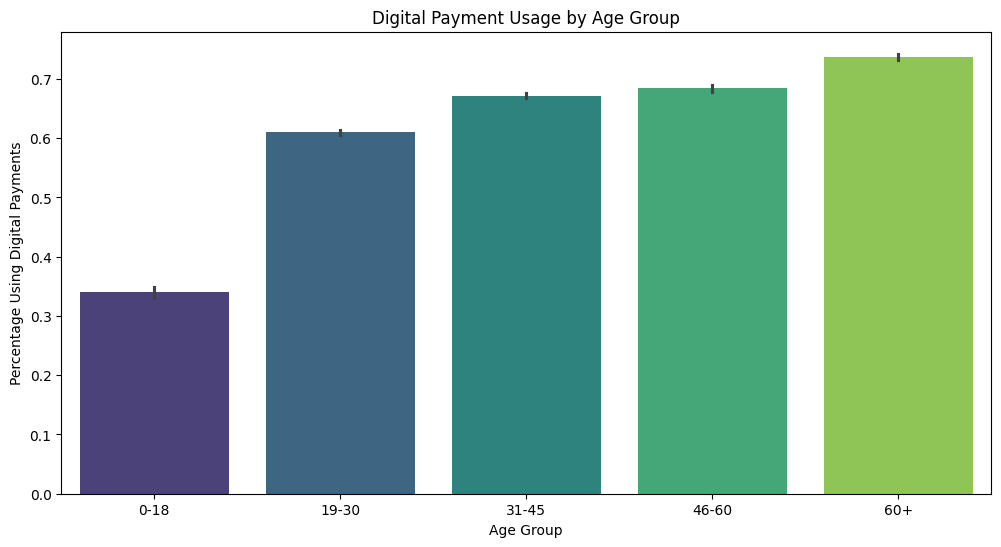

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant columns for digital payment analysis
selected_columns = ['regionwb', 'female', 'age', 'educ', 'inc_q', 'anydigpayment']
data_filtered = data[selected_columns].dropna()

# Convert the digital payment column ('anydigpayment') to binary values for easier analysis (1 = used, 0 = not used)
data_filtered['anydigpayment'] = data_filtered['anydigpayment'].apply(lambda x: 1 if x == 1 else 0)

# Plotting digital payment usage by gender and age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='female', y='age', hue='anydigpayment', data=data_filtered, palette="Set2")
plt.title("Digital Payment Usage by Gender and Age")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Age")
plt.legend(title="Digital Payment Usage", labels=["No", "Yes"])
plt.show()

# Plotting digital payment usage by education level and gender
plt.figure(figsize=(12, 6))
sns.catplot(x='educ', hue='female', col='anydigpayment', data=data_filtered, kind='count', palette='rocket', height=5, aspect=1.5)
plt.subplots_adjust(top=0.8)
plt.suptitle("Digital Payment Usage by Education Level and Gender", y=1.05)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# Plotting digital payment usage by age group
# Creating age groups for better visualization
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
data_filtered['age_group'] = pd.cut(data_filtered['age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='anydigpayment', data=data_filtered, estimator=lambda x: sum(x) / len(x), palette="viridis")
plt.title("Digital Payment Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage Using Digital Payments")
plt.show()


Question-2 Regional Disparities: Which regions have the highest and lowest adoption rates of digital payments, and what might be influencing these trends?
Let's break down the regional disparities in digital payment adoption.

<ipython-input-16-ed75f031af98>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_payment_use.index, y=region_payment_use.values, palette="viridis")


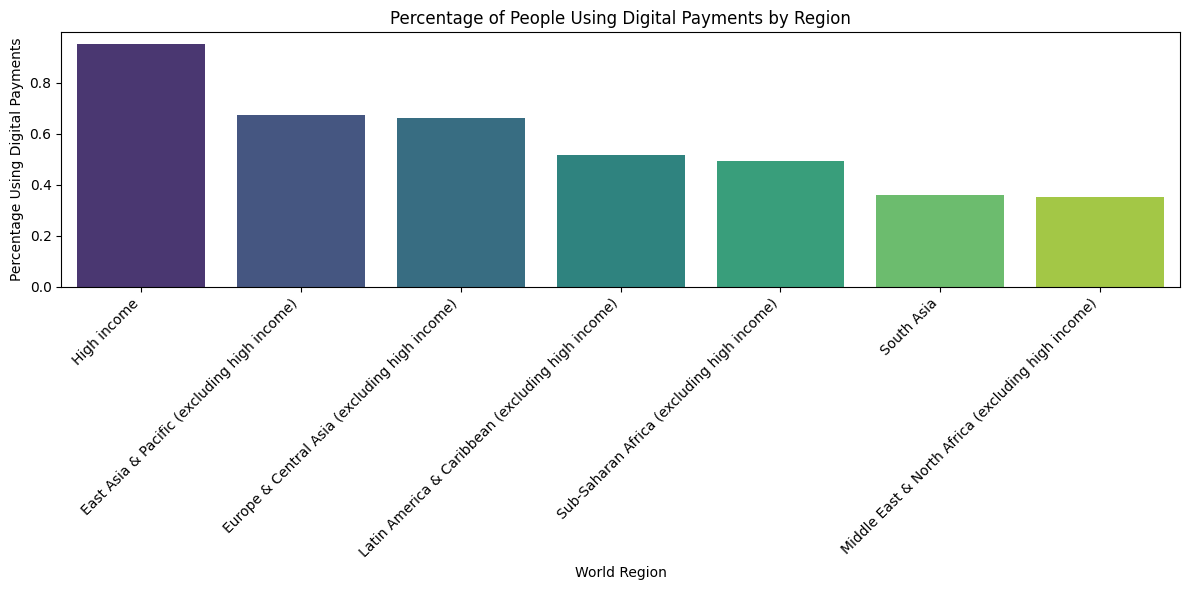

In [16]:
# Filter relevant columns for digital payment analysis
selected_columns = ['regionwb', 'anydigpayment']
data_filtered = data[selected_columns].dropna()

# Convert the digital payment column ('anydigpayment') to binary values for easier analysis (1 = used, 0 = not used)
data_filtered['anydigpayment'] = data_filtered['anydigpayment'].apply(lambda x: 1 if x == 1 else 0)

# Grouping by region to calculate the average usage of digital payments in each region
region_payment_use = data_filtered.groupby('regionwb')['anydigpayment'].mean().sort_values(ascending=False)

# Plotting the percentage of people using digital payments across different regions
plt.figure(figsize=(12, 6))
sns.barplot(x=region_payment_use.index, y=region_payment_use.values, palette="viridis")
plt.title("Percentage of People Using Digital Payments by Region")
plt.ylabel("Percentage Using Digital Payments")
plt.xlabel("World Region")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot
plt.show()


Question-3 How does income level influence the likelihood of using digital payments? Are wealthier individuals more likely to use these methods?

<ipython-input-17-6683aee42a5e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_payment_use.index, y=income_payment_use.values, palette="viridis")


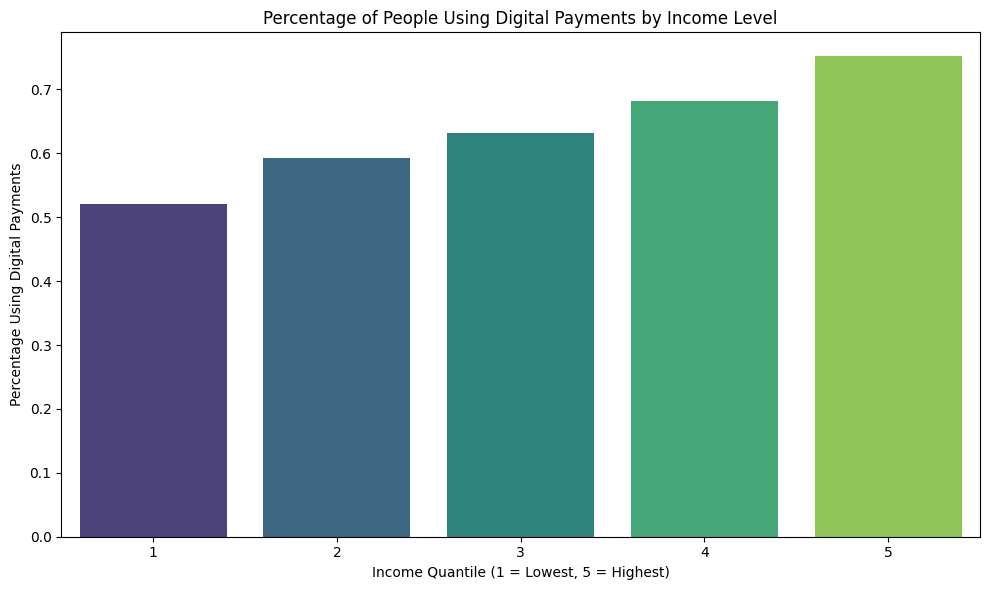

In [17]:
# Filter relevant columns for digital payment analysis
selected_columns = ['inc_q', 'anydigpayment']
data_filtered = data[selected_columns].dropna()

# Convert the digital payment column ('anydigpayment') to binary values for easier analysis (1 = used, 0 = not used)
data_filtered['anydigpayment'] = data_filtered['anydigpayment'].apply(lambda x: 1 if x == 1 else 0)

# Grouping by income quantile to calculate the average usage of digital payments
income_payment_use = data_filtered.groupby('inc_q')['anydigpayment'].mean().sort_values(ascending=False)

# Plotting the percentage of people using digital payments across different income levels
plt.figure(figsize=(10, 6))
sns.barplot(x=income_payment_use.index, y=income_payment_use.values, palette="viridis")
plt.title("Percentage of People Using Digital Payments by Income Level")
plt.ylabel("Percentage Using Digital Payments")
plt.xlabel("Income Quantile (1 = Lowest, 5 = Highest)")
plt.tight_layout()

plt.show()


This bar plot shows how the likelihood of using digital payments varies across
different income levels. Typically, higher income quantiles (such as 4 or 5) are expected to have higher adoption rates, which indicates that wealthier individuals are more likely to use digital payment methods.
This pattern could be attributed to greater access to technology, better financial literacy, and higher comfort levels with banking services among wealthier groups.

To conduct a statistical analysis of the dataset in order to understand the factors affecting digital payment adoption, let's formulate hypotheses and perform statistical tests, such as t-tests and chi-squared tests.

We will focus on the influence of gender on the likelihood of using digital payments.

Hypotheses
Gender and Digital Payment Usage (Chi-Squared Test):

Null Hypothesis (H0): There is no significant difference in the usage of digital payments between males and females.
Alternative Hypothesis (H1): There is a significant difference in the usage of digital payments between males and females.

In [18]:
import scipy.stats as stats


# Filter relevant columns for digital payment analysis
selected_columns = ['female', 'inc_q', 'anydigpayment']
data_filtered = data[selected_columns].dropna()

# Convert the digital payment column ('anydigpayment') to binary values for easier analysis (1 = used, 0 = not used)
data_filtered['anydigpayment'] = data_filtered['anydigpayment'].apply(lambda x: 1 if x == 1 else 0)

# -------------------------------
# Chi-Squared Test for Gender and Digital Payment Usage
# -------------------------------

# Contingency table for gender vs. digital payment usage
contingency_table = pd.crosstab(data_filtered['female'], data_filtered['anydigpayment'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Squared Test for Gender vs. Digital Payment Usage")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference in digital payment usage between males and females.\n")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in digital payment usage between males and females.\n")



Chi-Squared Test for Gender vs. Digital Payment Usage
Chi2 Statistic: 1185.9411866890514
P-value: 6.929253206383374e-260
Reject the null hypothesis: There is a significant difference in digital payment usage between males and females.



**Data reprocessing

In [11]:
data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip', encoding='latin-1')

In [17]:
# Select relevant columns
selected_columns = ['age', 'educ', 'inc_q', 'emp_in', 'account', 'mobileowner', 'internetaccess']
data = data[selected_columns]

#sample 1000 rows to reduce computational load
data=data.sample(1000, random_state=42).reset_index(drop=True)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)


# Normalizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

**K-means Clustering: We'll apply K-means clustering on the normalized data to identify patterns.

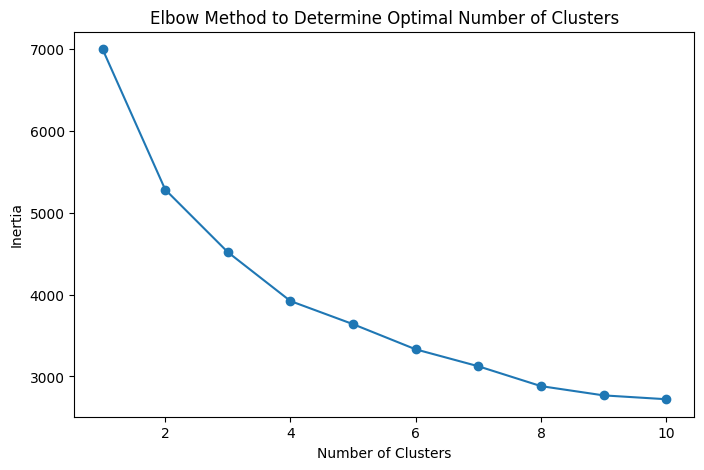

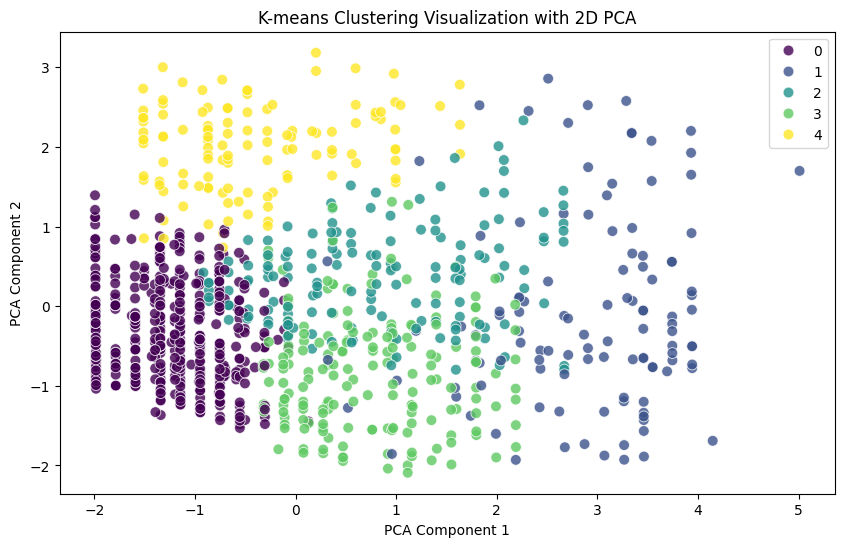

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Fit the KMeans model with an appropriate number of clusters (let's choose k=4 as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
data['kmeans_cluster'] = clusters_kmeans

# Visualization in 2D using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_kmeans, palette='viridis', s=60, alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Visualization with 2D PCA')
plt.show()


**Hierarchical Clustering: For hierarchical clustering, we have used scipy to visualize the dendrogram and use AgglomerativeClustering to form clusters.

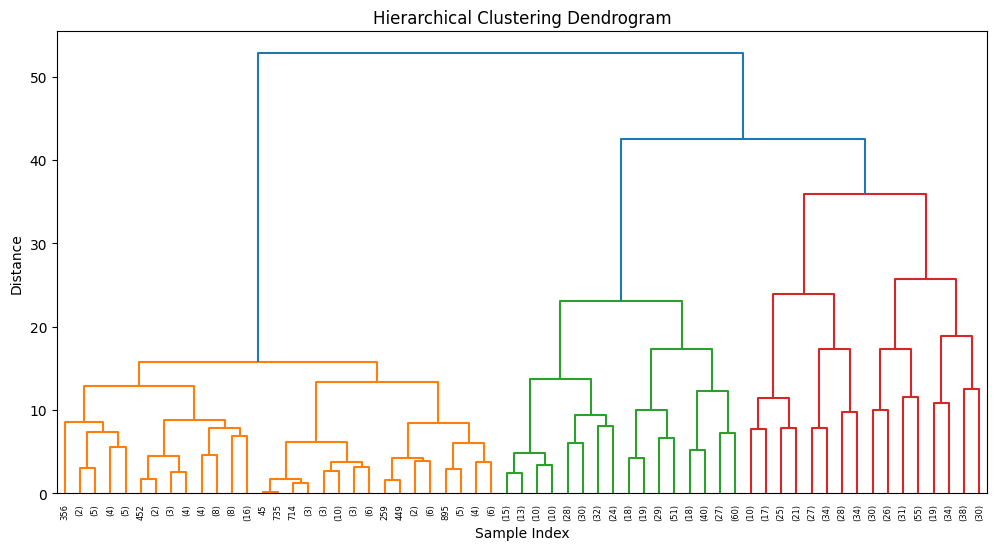

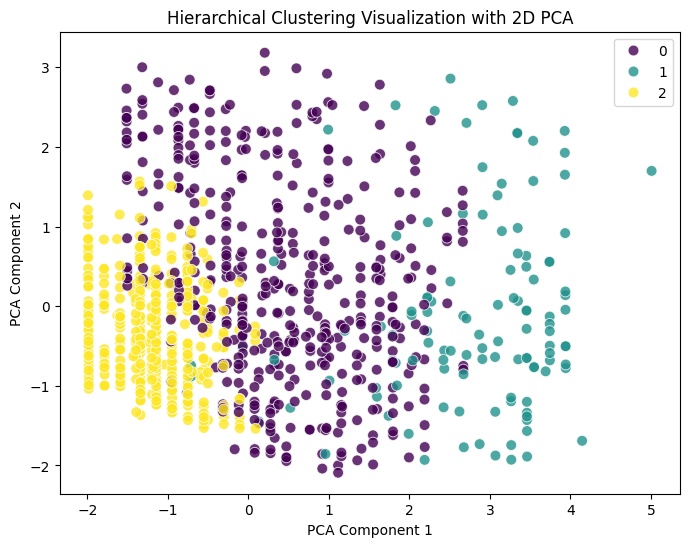

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')


# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
data['hierarchical_cluster'] = clusters_hierarchical

# Visualization in 2D using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_hierarchical, palette='viridis', s=60, alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering Visualization with 2D PCA')
plt.show()


**Building a recommendation engine

In [23]:
# Example: Recommending users similar to a given user_id (let's say we have a user_id=5)
user_id = 5
user_cluster = data.loc[user_id, 'kmeans_cluster']

# Get all users from the same cluster
recommended_users = data[data['kmeans_cluster'] == user_cluster]
print(f"Users recommended for user {user_id}:")
print(recommended_users)


Users recommended for user 5:
      age  educ  inc_q  emp_in  account  mobileowner  internetaccess  \
4    38.0     3      1     2.0        1            1               1   
5    74.0     2      4     2.0        1            1               1   
8    42.0     3      4     2.0        1            1               1   
27   71.0     1      2     2.0        1            1               1   
28   52.0     2      3     2.0        1            1               1   
..    ...   ...    ...     ...      ...          ...             ...   
991  66.0     3      1     2.0        1            1               1   
992  32.0     2      3     2.0        1            1               1   
994  69.0     3      5     2.0        1            1               1   
998  43.0     2      4     2.0        1            1               1   
999  57.0     2      1     2.0        1            1               2   

     hierarchical_cluster  kmeans_cluster  
4                       0               2  
5                